In [5]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, transpile

from qiskit.visualization import *

from fractions import Fraction

n_meas = 3

qreg_meas = QuantumRegister(n_meas, name="meas")
qreg_aux = QuantumRegister(1, name="aux")
creg_meas = ClassicalRegister(n_meas, name="out")

qc = QuantumCircuit(qreg_meas, qreg_aux, creg_meas)

qc.h(qreg_meas)
qc.x(qreg_aux)

angle = np.pi / 2

for x, ctrl in enumerate(qreg_meas):
    qc.cp(angle * (2 ** x), ctrl, qreg_aux[0])




In [6]:
def qft_dagger(qreg):
    qc = QuantumCircuit(qreg)

    for j in range(qreg.size // 2):
        qc.swap(qreg[j], qreg[-1-j])
        
    for itarg in range(qreg.size):
        for ictrl in range(itarg):
            power = ictrl - itarg - 1
            qc.cp(-2.*np.pi*(2**power), ictrl, itarg)
        qc.h(itarg)
    
    qc.name = "QFT^dagger"
    
    return qc

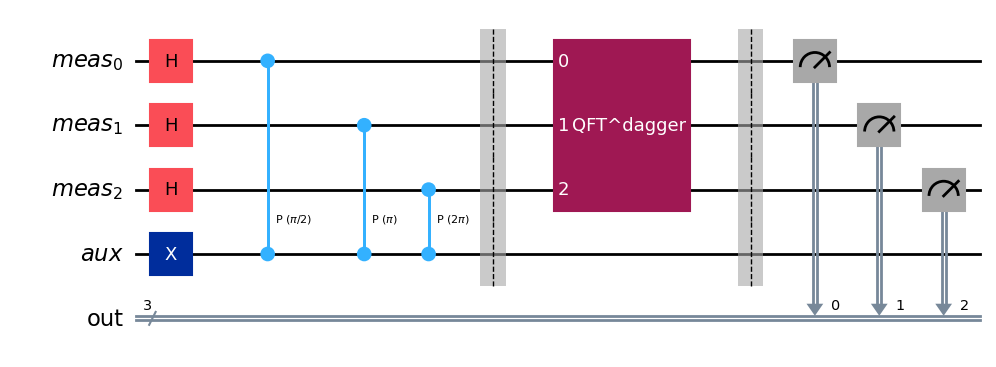

In [7]:
qc.barrier()
qc.append(qft_dagger(qreg_meas), qargs=qreg_meas)
qc.barrier()
qc.measure(qreg_meas, creg_meas)
qc.draw('mpl')

In [8]:
sim = AerSimulator()

compiled_circuit = transpile(qc, sim)

job = sim.run(compiled_circuit, shots=1024) 
result = job.result()

counts = result.get_counts(compiled_circuit)
print(counts)

{'010': 1024}


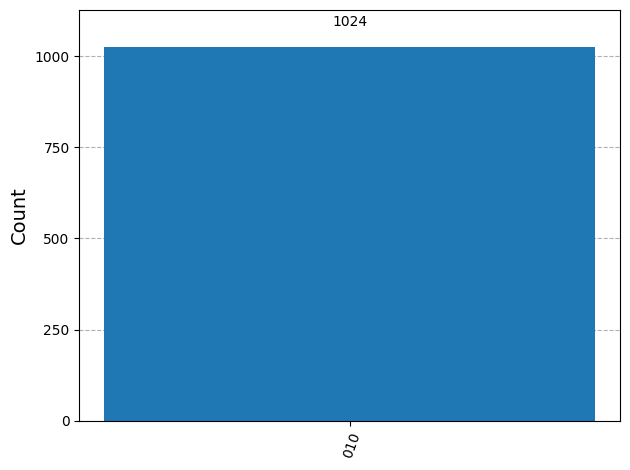

In [9]:
plot_histogram(result.get_counts(compiled_circuit))

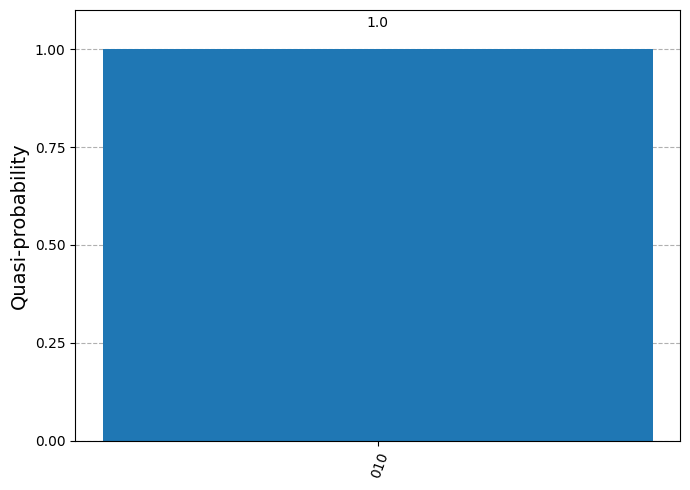

In [11]:
plot_distribution(result.get_counts(compiled_circuit))